In [1]:
# # Code to read csv file into colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [2]:
# downloaded = drive.CreateFile({'id':'1iJosm1f9YPo6EFZlPvlU0SN4BvhJQIfR'}) 
# downloaded.GetContentFile('clean_sentences.csv')


In [3]:
!pip install sklearn

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.models import load_model


from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.linear_model import LogisticRegression


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.preprocessing import sequence

import time
import html
from nltk.tokenize import WordPunctTokenizer
import re

np.random.seed(0)

%matplotlib inline

from keras.preprocessing import sequence
Keras has provide very nice text processing functions.

Then we can format our text samples and labels into tensors that can be fed into a neural network. To do this, we will rely on Keras utilities keras.preprocessing.text.Tokenizer and keras.preprocessing.sequence.pad_sequences.

In [5]:
clean_data = pd.read_csv("clean_sentences.csv")

In [6]:
df = pd.DataFrame(clean_data)

In [7]:
df.shape

(1600000, 2)

In [8]:
df.columns

Index(['Sentences', 'Label'], dtype='object')

In [9]:
np.sum(df.isnull().any(axis=1))

3373

In [10]:
df[df.isnull().any(axis=1)].head()

,Sentences,Label
208,NaN,0
249,NaN,0
398,NaN,0
430,NaN,0
1011,NaN,0


In [11]:
df = df.dropna()

In [12]:
df.shape

(1596627, 2)

In [13]:
np.sum(df.isnull().any(axis=1))

0

In [14]:
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [15]:
df.head()

,Sentences,Label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [16]:
df["Sentences"][1]

'is upset that he can not update his facebook by texting it and might cry as result school today also blah'

In [17]:
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [18]:
X = df["Sentences"]
y = df["Label"]

In [19]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(1596627,)
(1596627,)


In [20]:
print("no. of classes :")
print(np.unique(y))

no. of classes :
[0 1]


In [21]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
1519745


Sentence length: 
Mean 60.23 words (32.842545)


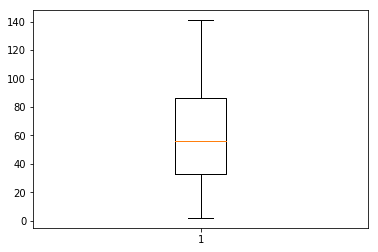

In [22]:
# Summarize sentence length
print("Sentence length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [24]:
df = df.dropna()

In [25]:
x = df["Sentences"]
y = df["Label"]

In [26]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=42)

In [27]:
tvec1 = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
tvec1.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [74]:
#store the TfidfVectorizer
with open("tfidf_result_2.pkl", 'wb') as handle:
                    pickle.dump(tvec1, handle)


In [29]:
x_train_tfidf = tvec1.transform(x_train)

In [30]:
x_train_tfidf

<1564694x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 29876579 stored elements in Compressed Sparse Row format>

In [31]:
x_validation_tfidf = tvec1.transform(x_validation).toarray()


In [32]:
clf = LogisticRegression()
clf.fit(x_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# y_train

In [34]:
clf.score(x_validation_tfidf, y_validation)

0.8207440811724915

In [35]:
clf.score(x_train_tfidf, y_train)

0.8419857173351467

In [36]:
norm = Normalizer().fit(x_train_tfidf)
x_train_tfidf_norm = norm.transform(x_train_tfidf)
x_validation_tfidf_norm = norm.transform(x_validation_tfidf)

In [37]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    np.random.shuffle(index)
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            np.random.shuffle(index)
            counter=0

In [38]:
x_train_tfidf.shape[0]

1564694

In [39]:
1564694/32

48896.6875

In [40]:
np.arange(np.shape(y_train)[0])

array([      0,       1,       2, ..., 1564691, 1564692, 1564693])

In [41]:
type(x_train_tfidf)

scipy.sparse.csr.csr_matrix

## Tetsing model accuracy and validation loss

In [42]:
# %%time
# # custom_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# from keras import optimizers

# custom_adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# model = Sequential()
# model.add(Dense(64, activation='relu', input_dim=100000))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=5, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

In [43]:
# %%time
# from keras import optimizers
# custom_adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim=100000))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=2, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/2
# 48897/48896 [==============================] - 1222s 25ms/step - loss: 0.4094 - acc: 0.8139 - val_loss: 0.3901 - val_acc: 0.8264
# Epoch 2/2
# 48897/48896 [==============================] - 1220s 25ms/step - loss: 0.3753 - acc: 0.8341 - val_loss: 0.3909 - val_acc: 0.8281
# CPU times: user 45min 41s, sys: 9min 53s, total: 55min 34s
# Wall time: 40min 43s

In [44]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(128, activation='relu', input_dim=100000))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=2, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)


# Epoch 1/2
# 48897/48896 [==============================] - 1206s 25ms/step - loss: 0.4085 - acc: 0.8137 - val_loss: 0.3884 - val_acc: 0.8283
# Epoch 2/2
# 48897/48896 [==============================] - 1206s 25ms/step - loss: 0.3719 - acc: 0.8353 - val_loss: 0.3883 - val_acc: 0.8281
# CPU times: user 45min 9s, sys: 9min 38s, total: 54min 48s
# Wall time: 40min 13s


In [45]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(128, activation='relu', input_dim=100000))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)


# Epoch 1/3
# 48897/48896 [==============================] - 1210s 25ms/step - loss: 0.4085 - acc: 0.8138 - val_loss: 0.3882 - val_acc: 0.8284
# Epoch 2/3
# 48897/48896 [==============================] - 1209s 25ms/step - loss: 0.3716 - acc: 0.8356 - val_loss: 0.3882 - val_acc: 0.8269
# Epoch 3/3
# 48897/48896 [==============================] - 1209s 25ms/step - loss: 0.3601 - acc: 0.8427 - val_loss: 0.3940 - val_acc: 0.8271
# CPU times: user 1h 7min 49s, sys: 14min 27s, total: 1h 22min 17s
# Wall time: 1h 29s

In [46]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(150, activation='relu', input_dim=100000))
# model_s.add(Dense(62, activation='relu'))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/3
# 48897/48896 [==============================] - 1385s 28ms/step - loss: 0.4079 - acc: 0.8143 - val_loss: 0.3879 - val_acc: 0.8278
# Epoch 2/3
# 48897/48896 [==============================] - 1376s 28ms/step - loss: 0.3590 - acc: 0.8434 - val_loss: 0.3867 - val_acc: 0.8275
# Epoch 3/3
# 48897/48896 [==============================] - 1376s 28ms/step - loss: 0.3121 - acc: 0.8723 - val_loss: 0.4090 - val_acc: 0.8240
# CPU times: user 1h 13min 56s, sys: 16min 40s, total: 1h 30min 37s
# Wall time: 1h 8min 58s

In [47]:
# %%time
# model = Sequential()
# model.add(Dense(250, activation='relu', input_dim=100000))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/3
# 48897/48896 [==============================] - 2080s 43ms/step - loss: 0.4084 - acc: 0.8137 - val_loss: 0.3965 - val_acc: 0.8199
# Epoch 2/3
# 48897/48896 [==============================] - 2077s 42ms/step - loss: 0.3586 - acc: 0.8445 - val_loss: 0.4009 - val_acc: 0.8212
# Epoch 3/3
#  1178/48896 [..............................] - ETA: 33:39 - loss: 0.3000 - acc: 0.8808

In [48]:
# %%time
# model = Sequential()
# model.add(Dense(200, activation='relu', input_dim=100000))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/3
# 48897/48896 [==============================] - 1724s 35ms/step - loss: 0.4120 - acc: 0.8132 - val_loss: 0.3998 - val_acc: 0.8268
# Epoch 2/3
# 48897/48896 [==============================] - 1715s 35ms/step - loss: 0.3643 - acc: 0.8415 - val_loss: 0.3902 - val_acc: 0.8276
# Epoch 3/3
# 48897/48896 [==============================] - 1717s 35ms/step - loss: 0.3259 - acc: 0.8674 - val_loss: 0.3952 - val_acc: 0.8238
# CPU times: user 1h 25min 8s, sys: 20min 55s, total: 1h 46min 4s
# Wall time: 1h 25min 57s

In [51]:
%%time
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=100000))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=2, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)


Epoch 1/2
48897/48896 [==============================] - 1818s 37ms/step - loss: 0.4118 - acc: 0.8128 - val_loss: 0.4103 - val_acc: 0.8188
Epoch 2/2
48897/48896 [==============================] - 1816s 37ms/step - loss: 0.3659 - acc: 0.8398 - val_loss: 0.4000 - val_acc: 0.8212
CPU times: user 58min 23s, sys: 15min 21s, total: 1h 13min 44s
Wall time: 1h 35s


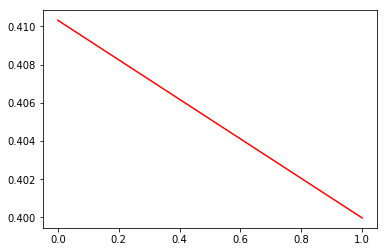

In [52]:
# plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation data loss", color='red')

In [73]:
# saving the model
model.save('nn-model_2.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
# loading the model
# model = load_model('nn-model.h5')

In [53]:
%%time
model.evaluate_generator(generator=batch_generator(x_train_tfidf, y_train, 32),steps=x_train_tfidf.shape[0]/32, 
                         max_queue_size=10, workers=1, use_multiprocessing=False)
# evaluate_generator(self, generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)




CPU times: user 13min 38s, sys: 2min 5s, total: 15min 44s
Wall time: 10min 3s


[0.3468012510431968, 0.8617173709368069]

## Prediction

In [54]:
x_test_tfidf = tvec1.transform(x_test).toarray()

In [55]:
# pred = model.predict_generator(generator=batch_generator(x_test_tfidf, y_test, 32),steps=x_test_tfidf.shape[0]/32, max_queue_size=10, 
#                                workers=1, use_multiprocessing=False, verbose=1)

In [56]:
pred = model.predict(x_test_tfidf, verbose=1)

15967/15967 [==============================] - 8s 532us/step


In [57]:
df_test_view = pd.DataFrame()
df_test_view["Sentences"] = x_test
df_test_view["real-y-values"] = y_test
df_test_view["Predictions"] = pred

In [58]:
df_test_view.head(20)

,Sentences,real-y-values,Predictions
1435744,well if you ever need ny tix we sell tix natio...,1,0.767916
1254910,whoohoo it going down you gotta check out it c...,1,0.906460
1510247,are you in seattle tomorrow if so let me know ...,1,0.912713
1395796,jade love the new photo gorgeous xxx,1,0.977026
969040,had the mother of all hangovers today super ev...,1,0.815885
824449,shall go and shower now and then go and pick t...,1,0.874542
1429481,wrong seb but thanks none the less,1,0.756166
598043,missin my baby,0,0.034979
465417,oh really that dissapointing,0,0.167027
1425459,soon soon sure we ll get em,1,0.917928


In [59]:
df_test_view[df_test_view["Predictions"] < 0.5].head(10)

,Sentences,real-y-values,Predictions
598043,missin my baby,0,0.034979
465417,oh really that dissapointing,0,0.167027
664066,damn papa was not included in the sexy follow ...,0,0.246816
698842,now the visitors are getting here now,0,0.454442
204941,homework alllll dayy then the ballet then more...,0,0.357346
1349987,up to my eyeballs in paper shreds yay summer c...,1,0.489729
1288541,it tuesday do not know why that particularly s...,1,0.351177
716919,cant beileve they beat us,0,0.247331
791681,first time did not have time to finish the test,0,0.133875
384,pepperoni rolls in called valentino they said ...,0,0.204939


In [60]:
df_test_view[df_test_view["Predictions"] > 0.5].head(10)

,Sentences,real-y-values,Predictions
1435744,well if you ever need ny tix we sell tix natio...,1,0.767916
1254910,whoohoo it going down you gotta check out it c...,1,0.906460
1510247,are you in seattle tomorrow if so let me know ...,1,0.912713
1395796,jade love the new photo gorgeous xxx,1,0.977026
969040,had the mother of all hangovers today super ev...,1,0.815885
824449,shall go and shower now and then go and pick t...,1,0.874542
1429481,wrong seb but thanks none the less,1,0.756166
1425459,soon soon sure we ll get em,1,0.917928
1459244,good morning lance how are you hope you are ha...,1,0.959980
1573286,night az sweet dreams talk to you later love ya,1,0.941846


## TEST

In [80]:
docs = ["I will not be able to come for your party, sorry"]

In [81]:

tok = WordPunctTokenizer()

mention1 = r'@[A-Za-z0-9]+'
mention2 = r'https?://[^ ]+'
combined_pat = r'|'.join((mention1, mention2))
www_pat = r'www.[^ ]+\.[^ ]+'
negations_dic = {"don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not", "wasn't":"was not", "weren't":"were not", "isn't":"is not", "aren't":"are not", 
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", }
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
combined_pattern = re.compile(combined_pat)
www_pattern = re.compile(www_pat)
letters_pattern = re.compile("[^a-zA-Z]")

In [82]:
def clean_sentence(lower, higher, texts):
  
  results = []
  start_time = time.time()
  
  for i in range(lower, higher):
    
    if (i - lower + 1) % 100000 == 0:
      end_time = time.time() - start_time
      print(i - lower + 1, "Sentences cleaned , time in seconds:", end_time)
      start_time = time.time()
    text = texts[i]
    html_unescaped = html.unescape(text)
    try:
        bom_removed = html_unescaped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = html_unescaped
    stripped = combined_pattern.sub('', bom_removed)
    stripped = www_pattern.sub('', stripped)
    lower_case = stripped.lower()
    words = [negations_dic[x] if x in negations_dic else x for x in lower_case.split(' ')]
    neg_handled = " ".join(words).strip()
    letters_only = letters_pattern.sub(" ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    results.append(" ".join(words).strip())
    
  return results

In [83]:
print("Sentence Cleaning........\n")
# clean_Sentences_test = []
# clean_Sentences_test.extend(clean_sentence(0, len(docs), docs))
clean_doc = clean_sentence(0, len(docs), docs)
print("\nSentence Cleaning Completed........\n")

Sentence Cleaning........


Sentence Cleaning Completed........



In [84]:
clean_doc

['will not be able to come for your party sorry']

In [85]:
# #load the content
tfidf = pickle.load(open("tfidf_result_2.pkl", "rb" ) )

In [88]:
pred_sentence = tfidf.transform(clean_doc).toarray()
# pred_sentence = tfidf.transform(clean_doc).toarray()


In [89]:
pred_sentence.shape

(1, 100000)

In [90]:
# # loading the modelfrom keras.models import load_model
model1 = load_model('nn-model_2.h5')

In [91]:
pred = model1.predict(pred_sentence, verbose=1)

1/1 [==============================] - 0s 43ms/step


In [92]:
pred

array([[0.14490604]], dtype=float32)

Reading links : 

1. https://nlp.stanford.edu/projects/glove/
